# **Task 1**

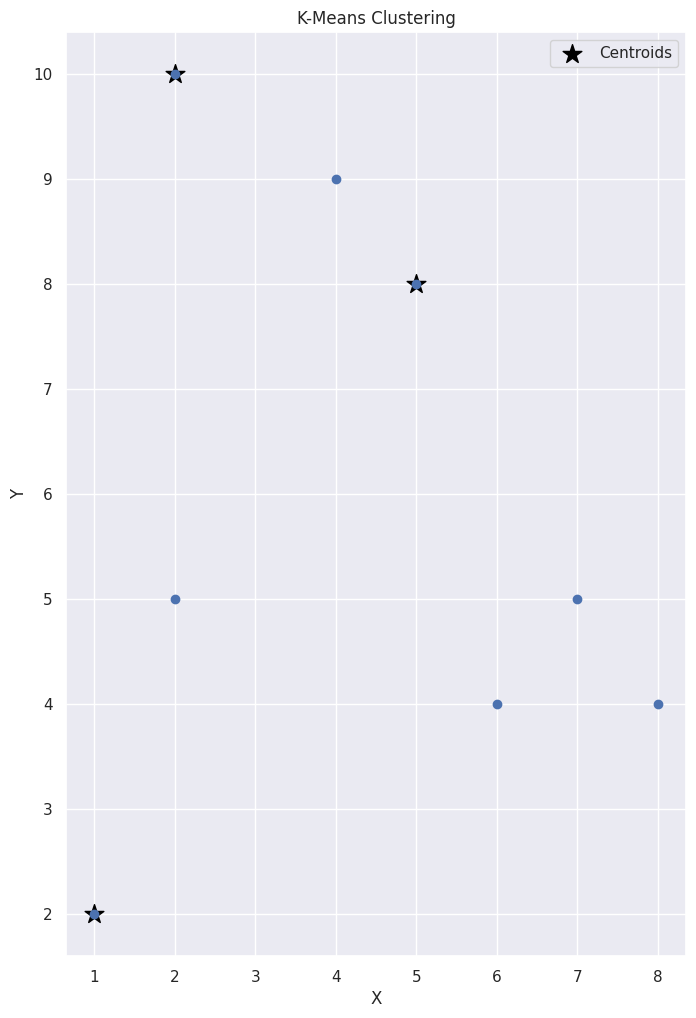

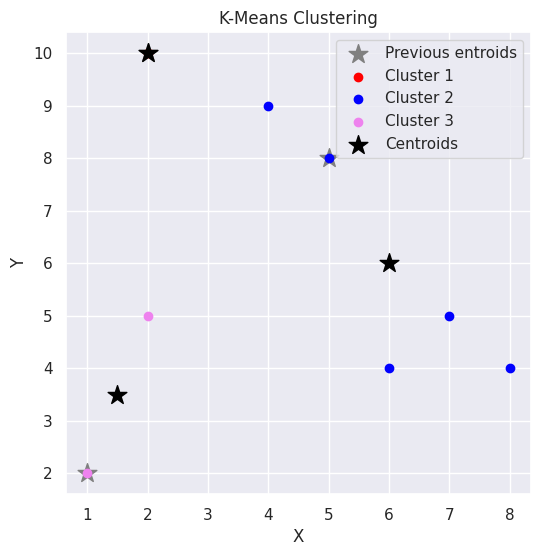

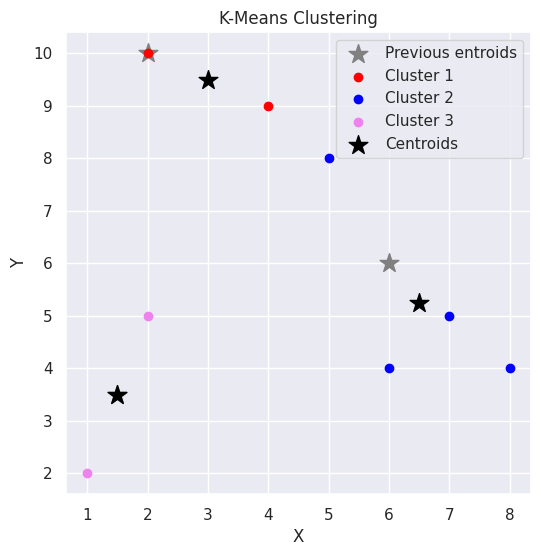

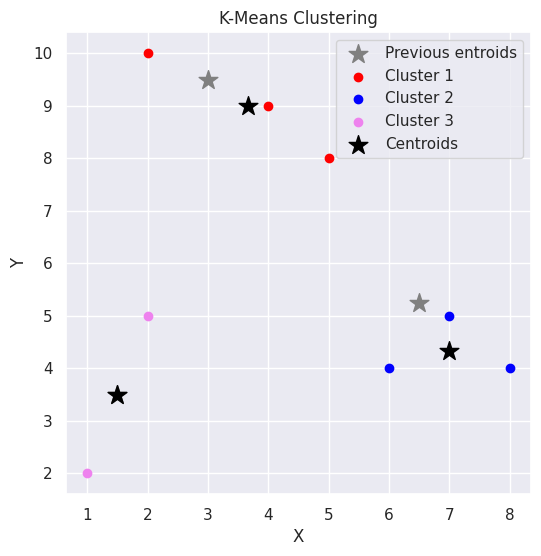

Centroids: [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]
Number of iterations: 3


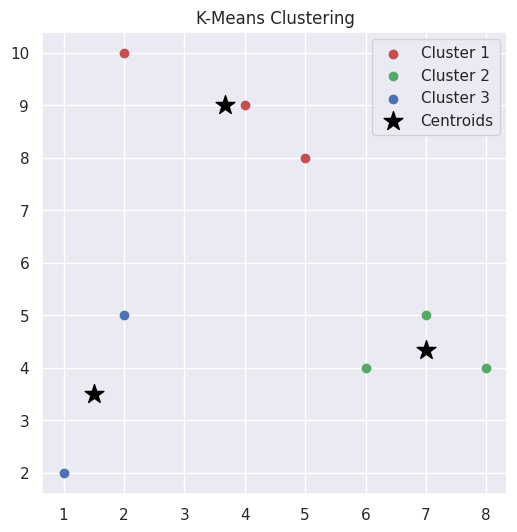

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
import numpy as np

colors = ['red','blue','violet']

def k_means(data, k, initial_centroids, max_iterations=100):
    if len(initial_centroids) != k:
        raise ValueError("Number of initial centroids must be equal to k")

    #initialize centroids to initial_centroids values
    centroids = initial_centroids
    iteration_count = 0

    #iterate algorithm for max number of iterations unless it reaches stopping criteria
    for iteration in range(max_iterations):
        #calculate distances from each point to centroids and assign point to the closest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        #generate new centroids by taking a mean of all points in a cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        #stoping the algorithm if newly generated centroids stayed the same 
        if np.all(centroids == new_centroids):
            break

        #increase count
        iteration_count = iteration + 1

        #graphing the clusters and initial centroids
        plt.figure(figsize=(6, 6))
        #plotting centroids of this iteration
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='grey', s=200, label='Previous entroids')
        
        #reassigning new centroids
        centroids = new_centroids
        #plotting clusters
        for i in range(k):
            cluster_data = data[labels == i]
            plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label='Cluster {}'.format(i+1))
        #plotting newly generated centroids
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=200, label='Centroids')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('K-Means Clustering')
        plt.legend()
        plt.show()

    return labels, centroids, iteration_count

# Initializing the data points, K parameter, and initail centroids
data = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
k = 3
initial_centroids = np.array([[2, 10], [5, 8], [1, 2]])

# plotting initial centroids and points unclustered
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='*', c='black', s=200, label='Centroids')
x = data[:, 0] 
y = data[:, 1] 
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

#running the algorithm 
labels, centroids, iteration_count = k_means(data, k, initial_centroids)

#printing centroid points and number of iterations
print("Centroids:", centroids)
print("Number of iterations:", iteration_count)

# Plotting the clusters and centroids (final result)
colors = ['r', 'g', 'b']
plt.figure(figsize=(6, 6))
for i in range(k):
      cluster_data = data[labels == i]
      plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label='Cluster {}'.format(i+1))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()



# **Task 2**

In [ ]:
from shapely.geometry import Polygon, Point
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming territory_data is a list of (x, y) coordinates forming a polygon
territory_data = pd.read_csv('/content/drive/MyDrive/IntML/Project data/South_Korea_territory.csv')

<Axes: xlabel='Longitude (deg)', ylabel='Latitude (deg)'>

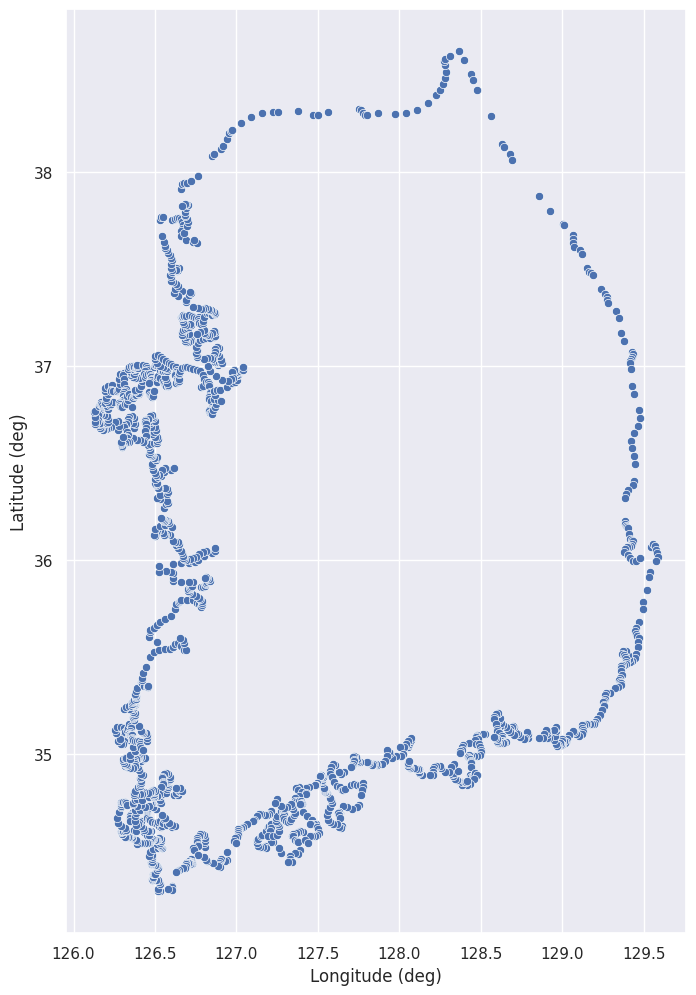

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(8,12)})
sns.scatterplot(x='Longitude (deg)', y='Latitude (deg)', data=territory_data)

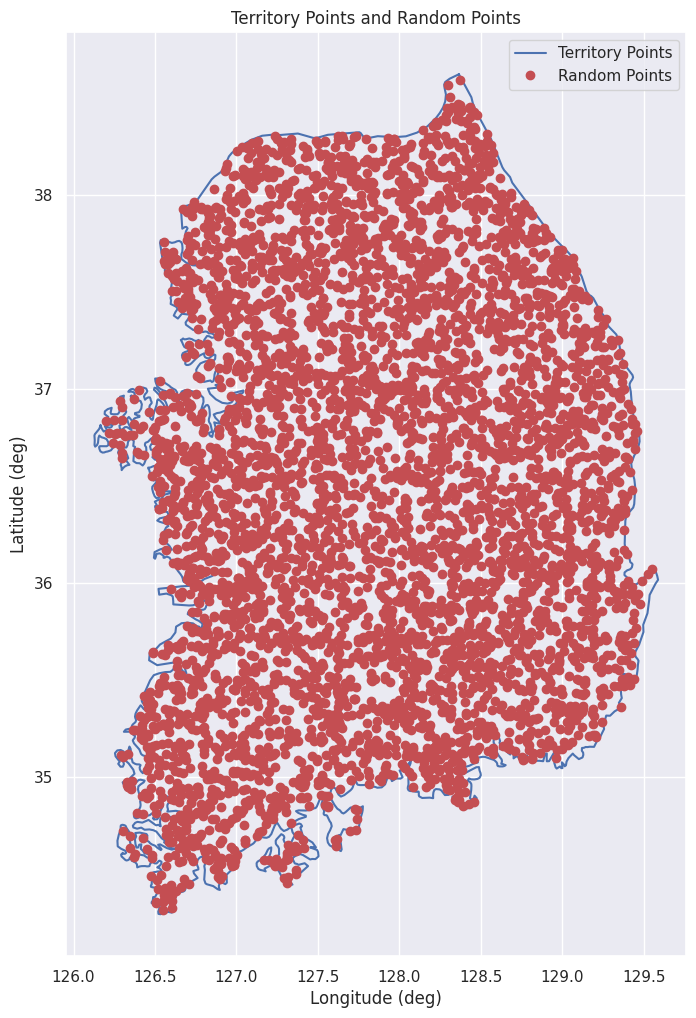

Number of iterations: 45


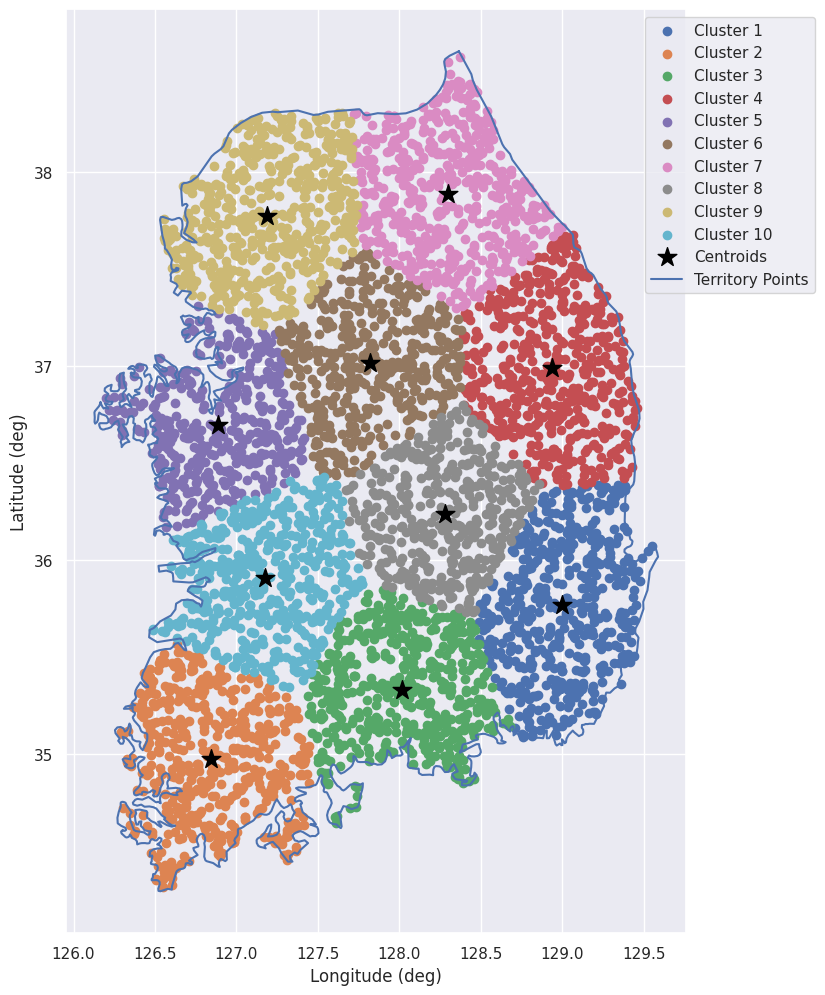

In [ ]:
territory_data = territory_data.to_numpy()

# Create a Polygon object representing the country
country_polygon = Polygon(territory_data)

# Determine the bounding box of the country
min_x, min_y = np.min(territory_data[:, 0]), np.min(territory_data[:, 1])
max_x, max_y = np.max(territory_data[:, 0]), np.max(territory_data[:, 1])

# Generate 5000 random points within the country
points_within_country = []
while len(points_within_country) < 5000:
    random_x = random.uniform(min_x, max_x)
    random_y = random.uniform(min_y, max_y)
    random_point = Point(random_x, random_y)
    if random_point.within(country_polygon):
        points_within_country.append((random_x, random_y))

# Convert points_within_country to a NumPy array
points_within_country = np.array(points_within_country)

# Plot the territory points
territory_x, territory_y = zip(*territory_data)
plt.plot(territory_x, territory_y, 'b-', label='Territory Points')

# Plot the randomly generated points
random_x, random_y = zip(*points_within_country)
plt.plot(random_x, random_y, 'ro', label='Random Points')
plt.title('Territory Points and Random Points')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.legend()
plt.show()


def k_means(data, k, max_iterations=20000):
    #set the count to 0
    iteration_count = 0

    #randomly generate initial centroids
    centroids = data[np.random.choice(range(len(data)), size=k, replace=False)]

    for iteration in range(max_iterations):
        #for each of the points, calculate the distance to each of the centroids
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        #assign the points to centroids to which they are the closest
        labels = np.argmin(distances, axis=1)

        #generate new centroids by taking the mean of all points in the cluster label
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        #stopping criteria. Algorithm stops if centroids did not move compared to previous iteration
        if np.all(centroids == new_centroids):
            break
        
        #asign to centroids newly generated values
        centroids = new_centroids
        iteration_count = iteration + 1 #increase the count

    return labels, centroids, iteration_count


#initialize K parameter and run the algorithm
k = 10
labels, centroids, iteration_count = k_means(points_within_country, k)

#Print number of iterations and and the resulting clusters and centroids
print("Number of iterations:", iteration_count) 
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 12))
for i in range(k):
    cluster_data = points_within_country[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label='Cluster {}'.format(i+1))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=200, label='Centroids')
#print territory boundaries
territory_x, territory_y = zip(*territory_data)
plt.plot(territory_x, territory_y, 'b-', label='Territory Points')
plt.legend(bbox_to_anchor=[1.22,1.0])
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.show()


# **Task 3**

In [ ]:
vertiport_candidates = pd.read_csv('/content/drive/MyDrive/IntML/Project data/Vertiport_candidates.csv')

<Axes: xlabel='Longitude (deg)', ylabel='Latitude (deg)'>

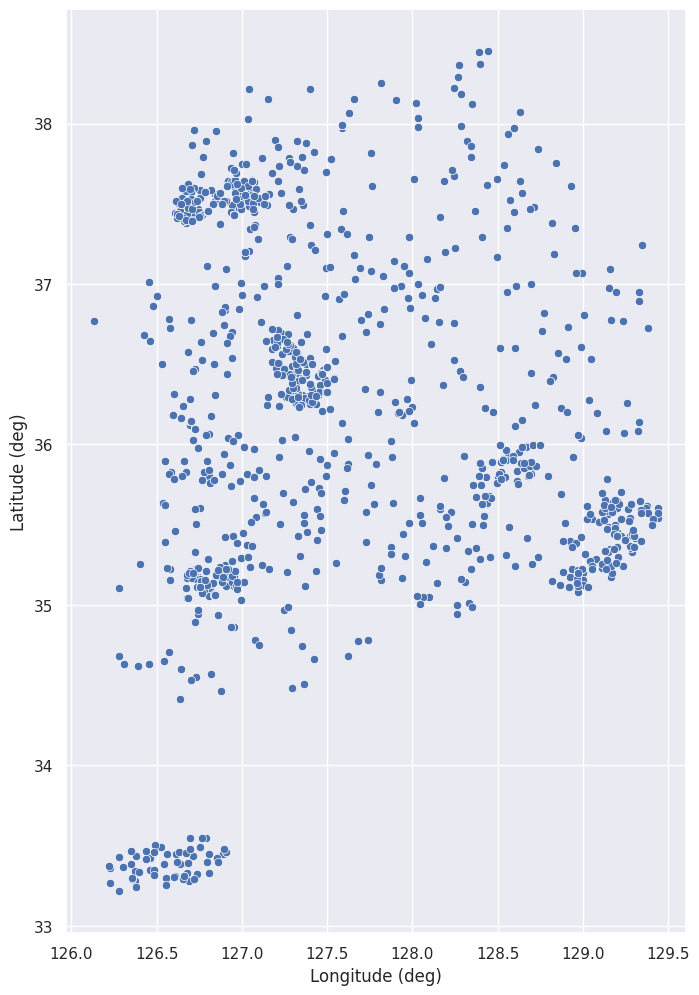

In [ ]:
#visualizing the Vertiport Candidates
sns.scatterplot(x='Longitude (deg)', y = 'Latitude (deg)', data=vertiport_candidates )

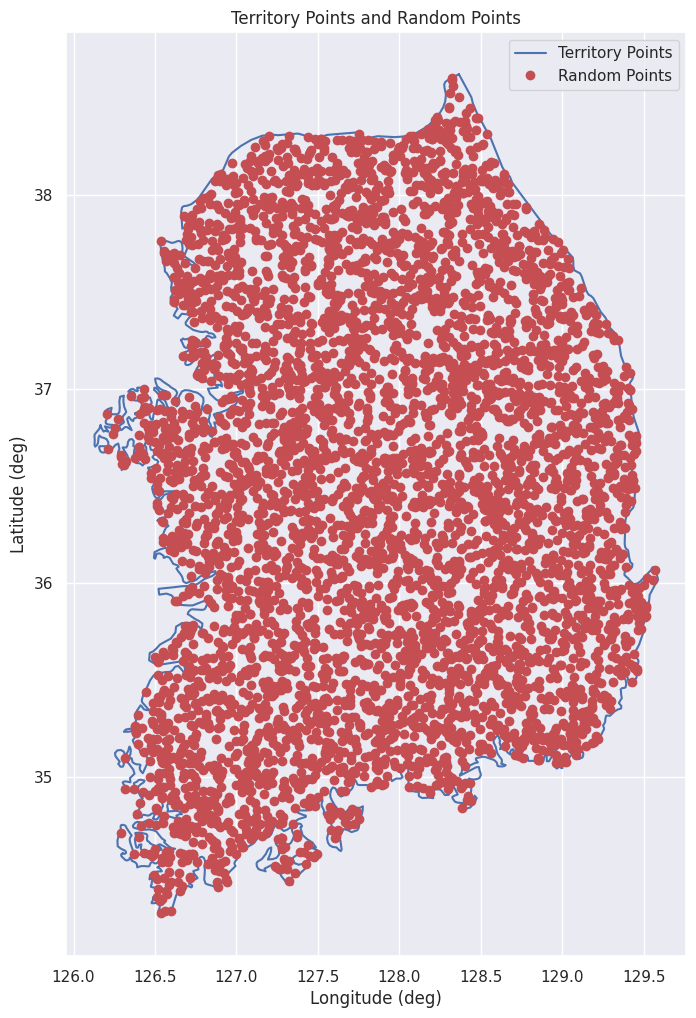

Number of iterations: 48


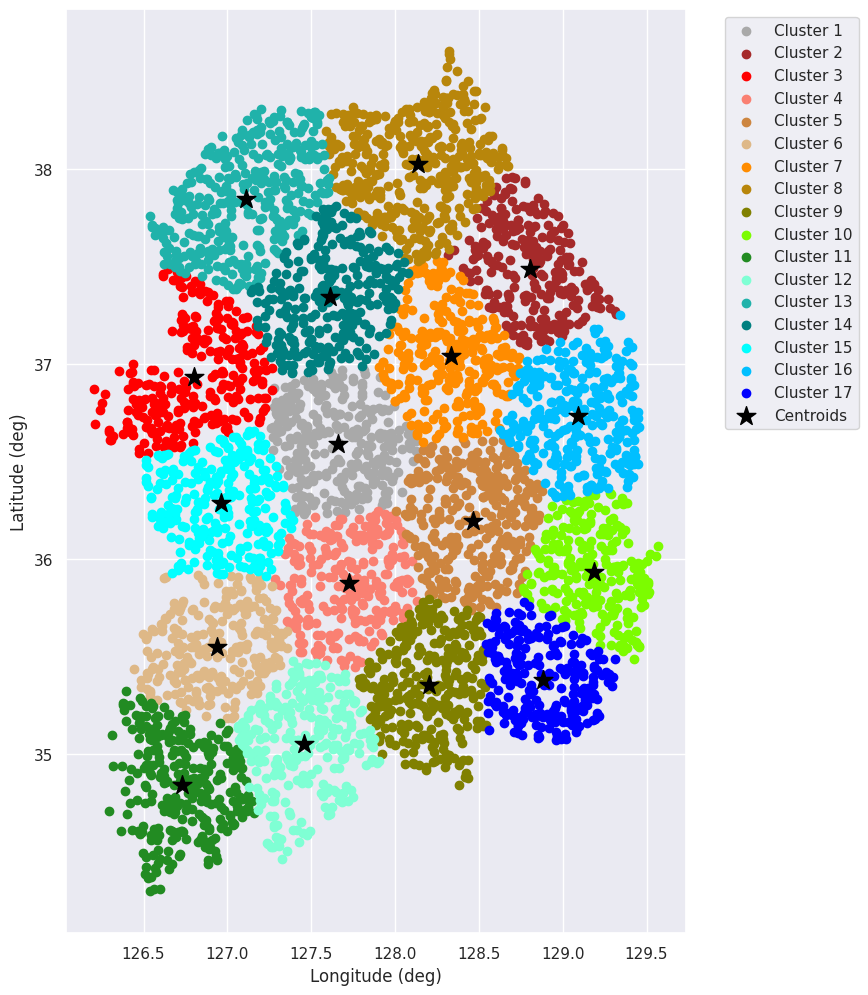

[[127.65726     36.58977733]
 [128.80739184  37.49054518]
 [126.79900088  36.93651986]
 [127.72540491  35.87864731]
 [128.46805362  36.19806183]
 [126.93562719  35.54942135]
 [128.33304822  37.04348497]
 [128.13908597  38.02524297]
 [128.2019094   35.35423646]
 [129.18417754  35.93556262]
 [126.73166873  34.84343159]
 [127.45461493  35.05432346]
 [127.11196224  37.84725776]
 [127.6100456   37.34642307]
 [126.95929981  36.28984311]
 [129.09022292  36.73630736]
 [128.88522049  35.38260792]]


In [ ]:
#Task 3 Approach 1
#generating evenly distributed 17 centroids to use the as initial centroids 

from shapely.geometry import Polygon, Point
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming territory_data is a list of (x, y) coordinates forming a polygon
territory_data = pd.read_csv("/content/drive/MyDrive/IntML/Project data/South_Korea_territory.csv").to_numpy()

# Create a Polygon object representing the country
country_polygon = Polygon(territory_data)

# Determine the bounding box of the country
min_x, min_y = np.min(territory_data[:, 0]), np.min(territory_data[:, 1])
max_x, max_y = np.max(territory_data[:, 0]), np.max(territory_data[:, 1])

# Generate 5000 random points within the country
points_within_country = []
while len(points_within_country) < 5000:
    random_x = random.uniform(min_x, max_x)
    random_y = random.uniform(min_y, max_y)
    random_point = Point(random_x, random_y)
    if random_point.within(country_polygon):
        points_within_country.append((random_x, random_y))

# Convert points_within_country to a NumPy array
points_within_country = np.array(points_within_country)

# Plot the territory points
territory_x, territory_y = zip(*territory_data)
plt.plot(territory_x, territory_y, 'b-', label='Territory Points')

# Plot the randomly generated points
random_x, random_y = zip(*points_within_country)
plt.plot(random_x, random_y, 'ro', label='Random Points')
plt.title('Territory Points and Random Points')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.legend()
plt.show()


def k_means(data, k, max_iterations=5000):
    iteration_count = 0
    
    #randomly initialize centroids
    centroids = data[np.random.choice(range(len(data)), size=k, replace=False)]

    #repeat the algorithm until max_iterations is reached 
    for iteration in range(max_iterations):
        #calculate the distance from each point to each centroid and assign point to closest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        #generate new centroids of the formed clusters by taking a mean of all poits in a cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        #terminate algorithm is the location of centroids did not change
        if np.all(centroids == new_centroids):
            break

        #assign new centroid values to centroids and increase count
        centroids = new_centroids
        iteration_count = iteration + 1

    return labels, centroids, iteration_count

#initlialize K parameter and start the algorithm
k = 17
labels, centroids, iteration_count = k_means(points_within_country, k)


#set the colors for the clusters
colors2 = ['darkgrey','brown','red','salmon','peru','burlywood','darkorange','darkgoldenrod','olive','lawngreen','forestgreen','aquamarine','lightseagreen',
           'teal','cyan','deepskyblue','blue','royalblue','blueviolet','indigo','fuchsia','deeppink','crimson','chocolate','yellow','lime']

#print the number of iterations and resulting clusters
print("Number of iterations:", iteration_count)
plt.figure(figsize=(8, 12))
for i in range(k):
    cluster_data = points_within_country[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label='Cluster {}'.format(i+1),c=colors2[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=200, label='Centroids')
plt.legend(bbox_to_anchor=[1.05,1.0])
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.show()
print(centroids)

[[128.22946691  38.05497026]
 [126.70865206  35.30945169]
 [127.75687842  37.31420394]
 [126.77817384  36.67789955]
 [128.69907896  36.15318064]
 [126.96091381  37.53657488]
 [127.54887939  35.2416372 ]
 [128.42119741  35.3543237 ]
 [129.16696717  35.66975142]
 [128.69340125  37.503289  ]
 [127.52560512  36.63138506]
 [127.06922935  35.97238428]
 [129.13857004  36.80933543]
 [126.86692322  34.73342301]
 [127.90263714  35.96826461]
 [127.4041273   37.99950296]
 [128.34382976  36.78436284]]
Centroids: [[128.29218012  38.0118488 ]
 [126.79605942  35.08992807]
 [127.45850423  37.29228675]
 [126.94043716  37.05514857]
 [128.57280052  35.86930034]
 [126.91984943  37.56548652]
 [127.4385015   35.19196627]
 [128.20582264  35.2951328 ]
 [129.08160842  35.31778988]
 [128.72287534  37.30937381]
 [127.3666467   36.38818203]
 [126.72853403  36.06502979]
 [129.04673781  36.53295925]
 [126.58561935  33.3874641 ]
 [127.76235723  35.93183496]
 [127.29612527  37.82542544]
 [128.0461675   36.83458331]]
N

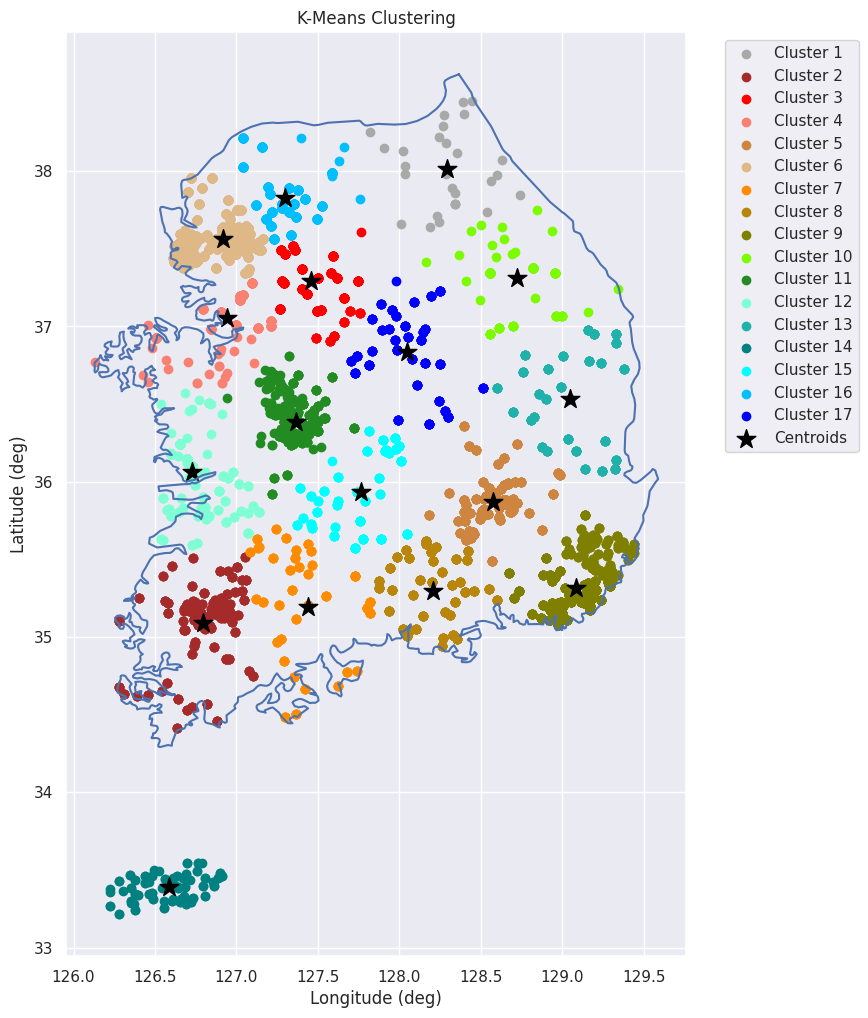

In [ ]:
#Task 3
#Generating centroids on Vertiport Candidates using evenly distributed centroids from last block as initial centroids
epsilon = 0.0000001  # convergence tolerance

#convert vertiport candidates array into numpy array
vertiport_candidates = vertiport_candidates.to_numpy()

#set initial centroids to the evenly distributed centroids generated in the last block
initial_centroids = np.copy(centroids)
print(initial_centroids)

def k_means(data, k, intial_cantroids, max_iterations=15000):
    #check if the number of centroids coresponds to the needed number of initial centorids
    if len(initial_centroids) != k:
        raise ValueError("Number of initial centroids must be equal to k")

    #set centroids to initial centroids and set count to 0
    centroids = initial_centroids
    iteration_count = 0

    #run the algorithm for the maximum number of iterations unless the stoppping criteria is reached
    for iteration in range(max_iterations):
        #calculate the distance from each point to each centroid and assign point to closest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        #generate new centroids of the formed clusters by taking a mean of all poits in a cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        #terminate algorithm is the location of centroids changed less than the epsilon value
        if np.all(abs(new_centroids - centroids) < epsilon):
            break
        
        #assign new centroid values to centroids and increase count
        centroids = new_centroids
        iteration_count = iteration + 1

    return labels, centroids, iteration_count

#initlialize K parameter and start the algorithm
k = 17
labels, centroids, iteration_count = k_means(vertiport_candidates, k, initial_centroids)



#set the colors for the clusters
colors2 = ['darkgrey','brown','red','salmon','peru','burlywood','darkorange','darkgoldenrod','olive','lawngreen','forestgreen','aquamarine','lightseagreen',
           'teal','cyan','deepskyblue','blue','royalblue','blueviolet','indigo','fuchsia','deeppink','crimson','chocolate','yellow','lime']

#print the number of iterations and resulting clusters
print("Centroids:", centroids)
print("Number of iterations:", iteration_count)
plt.figure(figsize=(8,12))
for i in range(k):
      cluster_data = vertiport_candidates[labels == i]
      plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label='Cluster {}'.format(i+1),c=colors2[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=200, label='Centroids')
plt.plot(territory_data[:,0], territory_data[:,1])
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('K-Means Clustering')
plt.legend(bbox_to_anchor=[1.05,1.0])
plt.show()



Centroids: [[128.15721236  35.27438686]
 [128.82772234  37.11588571]
 [127.47784096  35.64961853]
 [128.62027866  35.94296476]
 [126.89041407  37.96431005]
 [127.47356668  36.36419915]
 [127.74043674  37.13599435]
 [127.23456456  37.52925294]
 [126.84641378  35.06600225]
 [126.99471251  37.58158275]
 [126.71252366  36.07675041]
 [127.17399873  37.20311089]
 [127.39349343  37.83166713]
 [126.76682826  36.97766213]
 [126.73825183  37.49748522]
 [126.58561935  33.3874641 ]
 [129.08160842  35.31778988]]
Number of iterations: 14


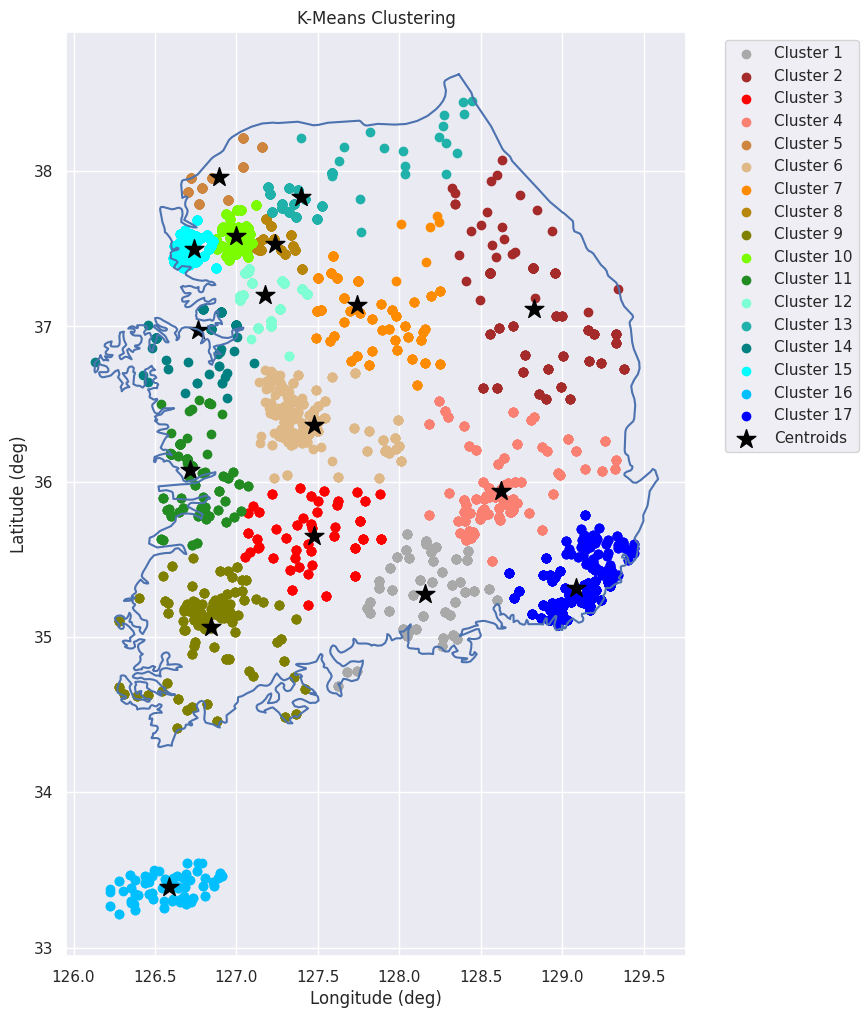

In [ ]:
#Task3 No Centroids given (Initial Centroids generated randomly)
epsilon = 0.0000001  # convergence tolerance


def k_means(data, k, max_iterations=100):
    #set centroids to initial centroids and set count to 0
    centroids = data[np.random.choice(range(len(data)), size=k, replace=False)]
    iteration_count = 0

    #run the algorithm for the maximum number of iterations unless the stoppping criteria is reached
    for iteration in range(max_iterations):
        #calculate the distance from each point to each centroid and assign point to closest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        #generate new centroids of the formed clusters by taking a mean of all poits in a cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        #terminate algorithm is the location of centroids changed less than the epsilon value
        if np.all(abs(new_centroids - centroids) < epsilon):
            break

        #assign new centroid values to centroids and increase count
        centroids = new_centroids
        iteration_count = iteration + 1

    return labels, centroids, iteration_count



#initlialize K parameter and start the algorithm
k = 17
labels, centroids, iteration_count = k_means(vertiport_candidates, k)


# Setting the colors for centroids
colors2 = ['darkgrey','brown','red','salmon','peru','burlywood','darkorange','darkgoldenrod','olive','lawngreen','forestgreen','aquamarine','lightseagreen',
           'teal','cyan','deepskyblue','blue','royalblue','blueviolet','indigo','fuchsia','deeppink','crimson','chocolate','yellow','lime']

#print the number of iterations and resulting clusters
print("Centroids:", centroids)
print("Number of iterations:", iteration_count)
plt.figure(figsize=(8,12))
for i in range(k):
      cluster_data = vertiport_candidates[labels == i]
      plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label='Cluster {}'.format(i+1), c=colors2[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=200, label='Centroids')
plt.plot(territory_data[:,0], territory_data[:,1])
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('K-Means Clustering')
plt.legend(bbox_to_anchor=[1.05,1.0])
plt.show()

In [ ]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(vertiport_candidates)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

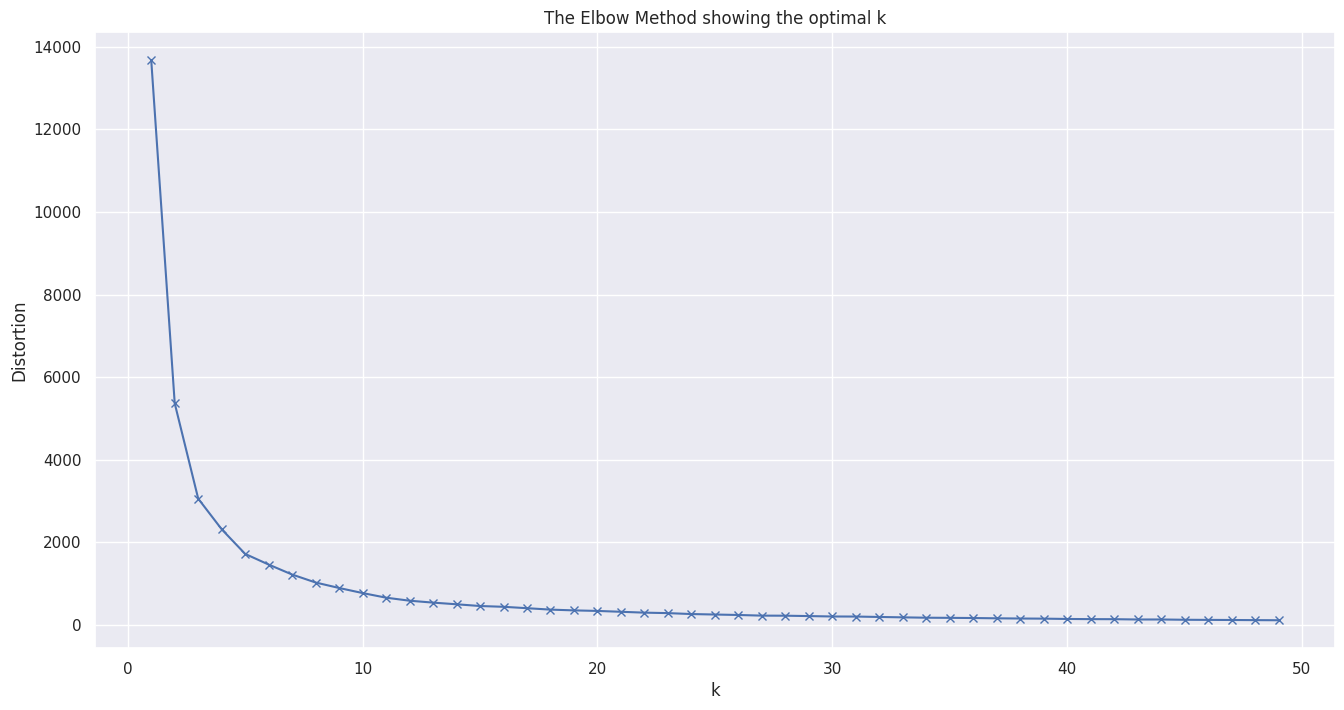

In [ ]:
#Using Elbow method for optimal number of Vertiports

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Centroids: [[128.91905203  35.1974532 ]
 [126.89041407  37.96431005]
 [128.21744855  35.29879819]
 [126.58561935  33.3874641 ]
 [127.31312445  37.45270068]
 [127.09113072  37.10252976]
 [126.70920059  37.57013585]
 [128.68830138  37.3843192 ]
 [127.99563908  36.93292308]
 [127.56303535  37.23135761]
 [129.19513693  35.5590732 ]
 [126.93512671  35.67820021]
 [127.63831744  35.43412377]
 [126.83155426  35.03571502]
 [128.55651848  35.85517003]
 [129.15004075  35.28622049]
 [127.06319609  37.48784436]
 [127.37609088  37.82462855]
 [127.3680651   36.37420273]
 [126.91585893  37.55949224]
 [126.7163138   37.42552854]
 [126.68397295  36.15625064]
 [127.98914496  36.24531613]
 [129.01714071  36.49563013]
 [127.03950966  37.66526232]
 [126.6773037   36.95127827]]
Number of iterations: 21


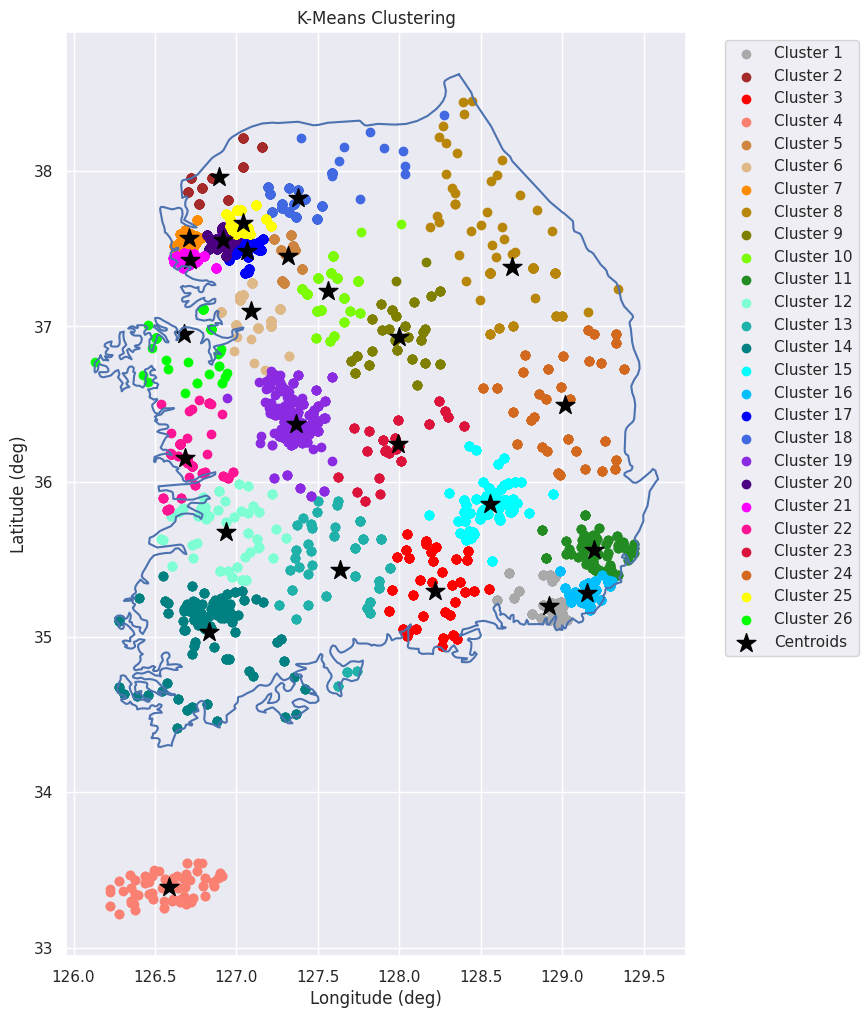

In [ ]:
#Task3 No Initil points
#Optimal Number of Vertiports - 26


#setting the colors for clusters
colors2 = ['darkgrey','brown','red','salmon','peru','burlywood','darkorange','darkgoldenrod','olive','lawngreen','forestgreen','aquamarine','lightseagreen',
           'teal','cyan','deepskyblue','blue','royalblue','blueviolet','indigo','fuchsia','deeppink','crimson','chocolate','yellow','lime']
# setting a convergence tolerance
epsilon = 0.0000001  


def k_means(data, k, max_iterations=100):
    #set centroids to initial centroids and set count to 0
    centroids = data[np.random.choice(range(len(data)), size=k, replace=False)]
    iteration_count = 0

    #run the algorithm for the maximum number of iterations unless the stoppping criteria is reached
    for iteration in range(max_iterations):
        #calculate the distance from each point to each centroid and assign point to closest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        #generate new centroids of the formed clusters by taking a mean of all poits in a cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        #terminate algorithm is the location of centroids changed less than the epsilon value
        if np.all(abs(new_centroids - centroids) < epsilon):
            break
        
        #assign new centroid values to centroids and increase count
        centroids = new_centroids
        iteration_count = iteration + 1

    return labels, centroids, iteration_count



#initlialize K parameter and start the algorithm
k = 26
labels, centroids, iteration_count = k_means(vertiport_candidates, k)


#print the number of iterations and resulting clusters
print("Centroids:", centroids)
print("Number of iterations:", iteration_count)
plt.figure(figsize=(8,12))
for i in range(k):
      cluster_data = vertiport_candidates[labels == i]
      plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label='Cluster {}'.format(i+1), c=colors2[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=200, label='Centroids')
plt.plot(territory_data[:,0], territory_data[:,1])
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('K-Means Clustering')
plt.legend(bbox_to_anchor=[1.05,1.0])
plt.show()

